# Лабораторна робота №2 з Видобування даних
## Розуміння даних
### Мета роботи: навчитися базовому фунукціоналу pandas/matplotlib для числельного і візуального аналізу вхідних даних та їх характеристик

In [ ]:
print('Brych Test')

Brych Test


###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame за допомогою pandas відобразіть перші 10 записів 

In [115]:
### Code starts from here ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/brych126/DataMining/main/movies3.csv'
dataset = pd.read_csv(url, encoding='latin-1')
dataset.head(10) 


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,2/6/1987,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,6/27/1986,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,10/23/1986,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,2/28/1986,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,8/15/1986,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


###2.Опишіть колонки які ви використовуєте для аналізу в подальшому, що за дані в них зберігаються якщо потрібен опис або їх призначення неочевидне / специфічне для домену 


###3.Чи є [категоріальні / числові дані](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee) ? [Виведіть усі варіанти категорій для певної колонки](https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/) ( в рамках розуміного - якщо ці категорії це унікальні значення тоді не треба). Чи є закодовані дані (з використанням скорочень / кодів / ітд) - що вони значать у вашому випадку? 
 

In [114]:
print(dataset['genre'].unique())


['Adventure' 'Comedy' 'Action' 'Drama' 'Crime' 'Thriller' 'Horror'
 'Animation' 'Biography' 'Sci-Fi' 'Musical' 'Family' 'Fantasy' 'Mystery'
 'War' 'Romance' 'Western']


###4.Виведіть максимальні / мінімальні значення для числових колонок. Чи вони коректні в реаліях домену? Чи вони взагалі є подібним до реальності числом чи швидше заглушкою/помилкою?


In [116]:
print("By the year of release of the film:")
print('The oldest movie:', dataset['year'].min())
print('The latest movie:', dataset['year'].max())
print("*****************************************")
print("By the budget of the film:")
print('The biggest budget of the movie:', dataset['budget'].max())
print('The lowest budget of the movie:', dataset['budget'].min())
print("*****************************************")
print("By the score of the film:")
print('The movie with the highest score:', dataset['score'].max())
print('The movie with the lowest score:', dataset['score'].min())

By the year of release of the film:
The oldest movie: 1986
The latest movie: 1995
*****************************************
By the budget of the film:
The biggest budget of the movie: 115000000
The lowest budget of the movie: 0
*****************************************
By the score of the film:
The movie with the highest score: 9.3
The movie with the lowest score: 1.6


###5.чи є у вас у даних пусті / null / нулі / або інакшим чином некоректні / незаповнені записи або клітинки? Наскільки ці колонки для вас критичні якщо такі є?  [(help)](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
)

(**sic!** в рамках даної лабораторної тільки виявлення таких записів без їхньої зміни - тільки якщо вона потрібна вашим подальшим завданням у даній лабораторні)


In [117]:
print(dataset.shape)
print(dataset[dataset.budget > 0].shape)

(1999, 15)
(991, 15)


###6.Виведіть за допомогою matplotlib/seaborn 3 або більше (якщо хочете) [розподілів для даних](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0); що з них можна дізнатися цікавого/корисного для нас? [Який тип ймовріносного розподілу для них найближчий? ](http://tinyheero.github.io/assets/prob-distr/overview-prob-distr.png)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


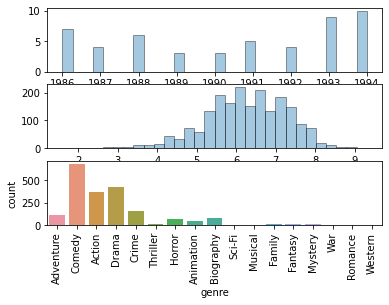

In [176]:
#movies released in period of 1986-1994 with score greater than 8.0
movies_list = dataset[dataset.year.between(1986, 1994, inclusive=True)][dataset.score >= 8.0]
plt.subplot(3, 1, 1)
dates_plot = sns.distplot(x = movies_list['year'], hist=True, kde=False,
                          bins=30, hist_kws={'edgecolor':'black'})
#by scores
plt.subplot(3, 1, 2)
dates_plot = sns.distplot(x = dataset['score'], hist=True, kde=False,
                          bins=30, hist_kws={'edgecolor':'black'})
# #scores of movies
plt.subplot(3, 1, 3)
movies_chart1 = sns.countplot(x = dataset['genre'], data=dataset)
movies_chart1.set_xticklabels(movies_chart1.get_xticklabels(), rotation=90)
None

###7.Виведіть 3 (або більше якщо вважаєте за потрібне) графіки за допомогою [matplotlib](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)/seaborn/ggplot/altair для ваших колонок. Що з них корисного / цікавого можна дізнатися? (не обов'язково довго мудрувати можете описати що бачите на них якщо немає якихось нових здогакдок/інсайтів)


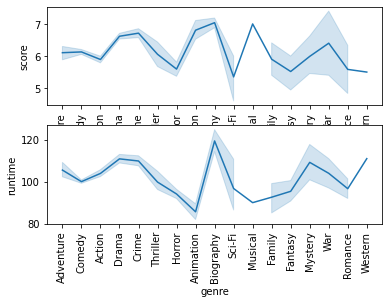

In [173]:
# companies_list = dataset[dataset.company.isin(['Columbia Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Walt Disney Pictures'])]
# print(companies_list.shape)
#movies score by genres
plt.subplot(2, 1, 1)
movies_plot = sns.lineplot(data=dataset, x='genre', y='score')
movies_plot.set_xticklabels(movies_chart1.get_xticklabels(), rotation=90)
None
#movies runtime by genres
plt.subplot(2, 1, 2)
movies_plot = sns.lineplot(data=dataset, x='genre', y='runtime')
movies_plot.set_xticklabels(movies_chart1.get_xticklabels(), rotation=90)
None




###8.[Виведіть кореляційну матрицю або heatmap для ваших даних](https://datatofish.com/correlation-matrix-pandas/) (можете обрати частину з них). Чи є цікаві /до того не замітні кореляції між даними? Чи вони були очевидні до того або їх можна пояснити гіпотезою з вашого боку? Наведіть 3 приклади.

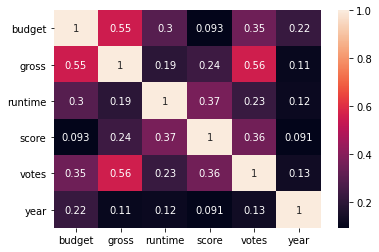

In [140]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
